In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def generate_data(N, k=None, means=None, cov=None):
    cov = [[[0.8, 0], [0, 0.8]], [[0.5, 0], [0, 0.5]], [[0.5, 0], [0, 0.5]]] if cov is None else cov
    means = [[-2, -2], [3, 3], [7, 7]] if means is None else means
    k = 3 if k is None else k
    data = []
    for c in range(k):
        data_ = np.random.multivariate_normal(means[c], cov[c], N)
        data.append(data_)
    return np.array(data).reshape(-1, 2)

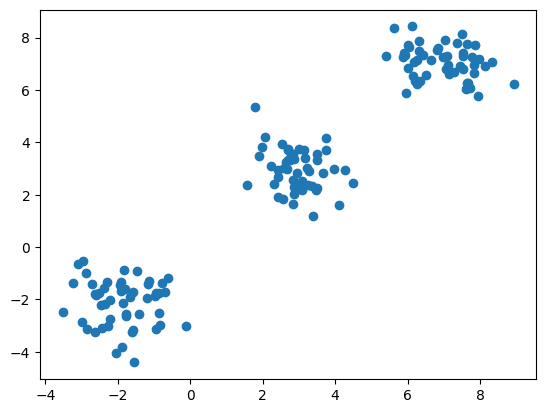

In [44]:
data = generate_data(N=50)
plt.scatter(data[:, 0], data[:, 1])

In [56]:
class Kmeans():
    def __init__(self, k, n_feat=2, n_iter=50, tol=0.001):
        self.k = k
        self.labels = None
        self.centroids = None
        self.n_feat = n_feat
        self.n_iter = n_iter
        self.tol = tol
    def fit(self, x):
        """
        x [N x F]: N samples, each of F features
        """
        assert(self.n_feat == x.shape[1])
        self.initialize_centroids(x)
        for i in range(self.n_iter):
            self.labels, _ = self.label_samples(x)
            centroids_old = self.centroids
            self.compute_centroids(x)
            stop_rule = self.stopping_criterion(centroids_old)
            if stop_rule:
                break
        return self.labels, self.centroids
    
    
    def initialize_centroids_naive(self, x):
        min_fea = np.min(x, axis=0)
        max_fea = np.max(x, axis=0)
        print(min_fea, max_fea)
        self.centroids = np.zeros((self.k, self.n_feat))
        for f in range(self.n_feat):
            self.centroids[:, f] = (max_fea[f] - min_fea[f]) * np.random.rand(self.k) + min_fea[f]
                   

    def initialize_centroids(self, x):
        inds = [i for i in range(x.shape[0])]
        ind_c = []
        ind_c.append(np.random.choice(inds))
        D = np.sum((x - x[ind_c[0], :])**2, axis=-1)
        
        for k1 in range(1, self.k):
            prob = D ** 2 / np.sum(D **2)
            ind_c.append(np.random.choice(inds, p=prob))
            for j in ind_c:
                dist = list(np.sum((x - x[j, :])**2, axis=-1))
                D = [min(d1, d2) for d1, d2 in zip(list(D), dist)]
                D = np.array(D)
        self.centroids = np.zeros((self.k, self.n_feat))
        for i, ind in enumerate(ind_c):
            self.centroids[i, ] = x[ind, :]
                
            
    
    def label_samples(self, x):
        dist = np.zeros((x.shape[0], self.k))
        for i in range(self.k):
            dist[:, i] = np.sqrt(np.sum((x - self.centroids[i, :])**2, axis=1))
        
        labels = np.argmin(dist, axis=1)
        return labels, dist
    
    def compute_centroids(self, x):
        for i in range(self.k):
            self.centroids[i, :] = np.mean(x[self.labels==i, :], axis=0)
    
    def stopping_criterion(self, centroids_):
        mse = np.mean(np.sum((centroids_ - self.centroids) **2, axis=1))
        if mse < self.tol:
            return True
        return False
    
    


[[-0.87025799 -2.52093482]
 [ 6.13245106  8.42720893]
 [ 3.0941802   2.5277923 ]]


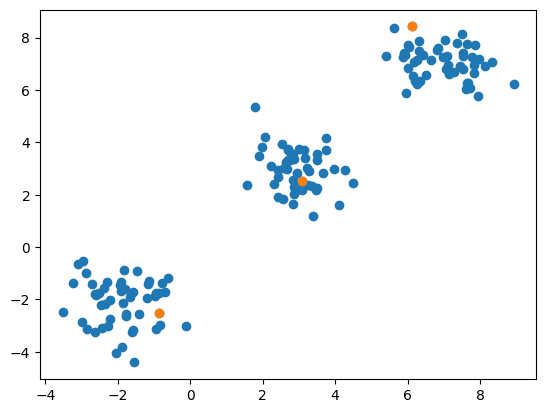

In [53]:
# test centroids
kmeans = Kmeans(k=3)
kmeans.initialize_centroids(data)
print(kmeans.centroids)
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1])

[[-1.87626475 -2.12305427]
 [ 6.95409834  7.0717464 ]
 [ 2.95433299  2.94235511]]


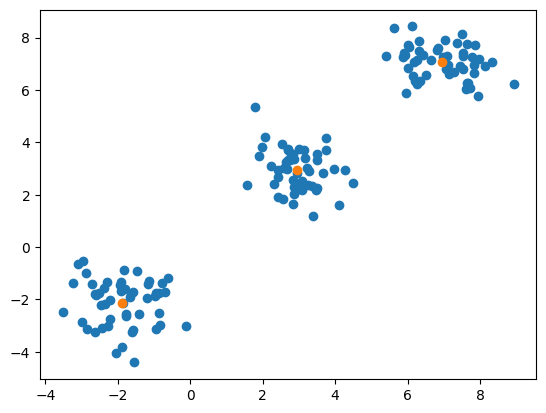

In [54]:
kmeans = Kmeans(3, 2, n_iter=10, tol=10e-10)
labels, centroids = kmeans.fit(data)
print(centroids)
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1])